EOF
Execution time: 236.802 seconds.
128 nodes, per-node= <8 heavy+ 16 light>
Total size 145.8828125 kbytes, 
Heavy part: 123.8828125 kbytes
Light part: 22.0 kbytes
Precision:  0.664


C:\Users\PERO\Python\Proposal\20220101\hg\Func.py:146: RuntimeWarning: overflow encountered in long_scalars
  all_aae+=abs(estimate-gt_dict[item])


heavy_are: 0.030,heavy_aae:162.599
all_are:3080.619,all_aae:-3140.897
Estimate time:  10.841 seconds.


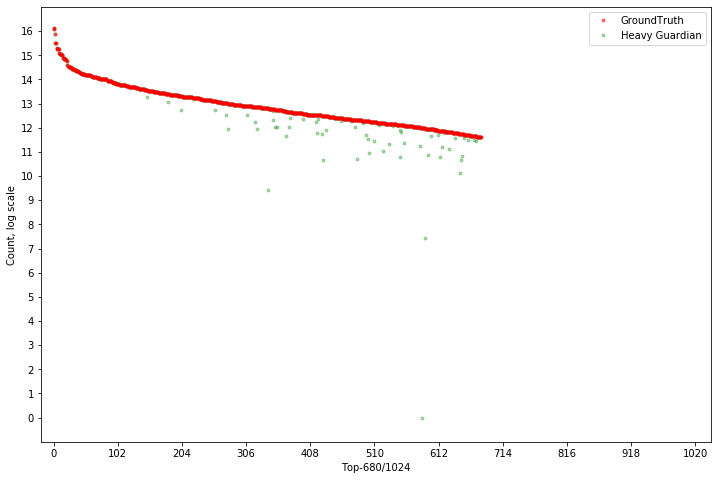

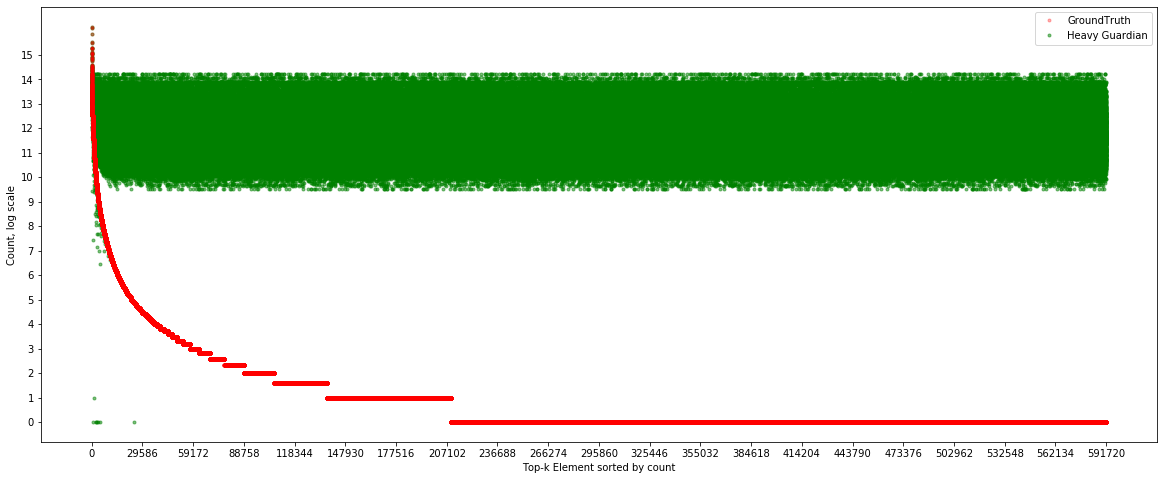

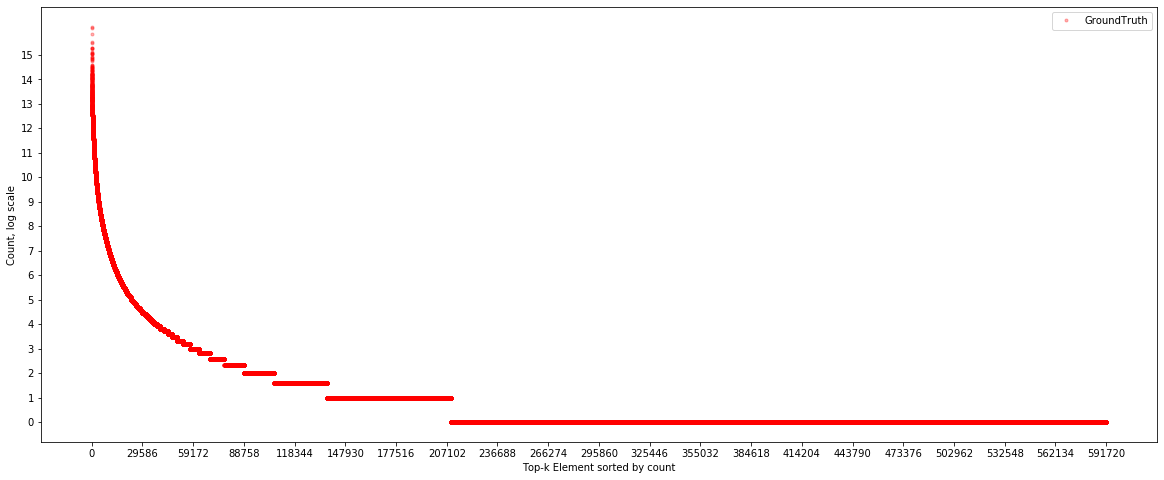

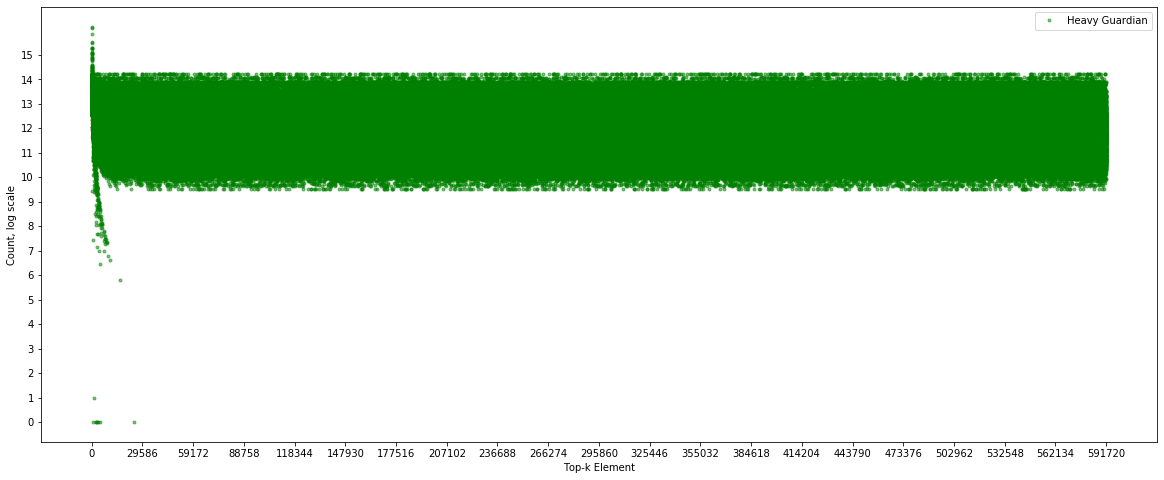

In [1]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=128
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 261.659 seconds.
200 nodes, per-node= <8 heavy+ 16 light>
Total size 243.375 kbytes, 
Heavy part: 209.0 kbytes
Light part: 34.375 kbytes
Precision:  0.844
heavy_are: 0.012,heavy_aae:67.606
all_are:1583.434,all_aae:2119.659
Estimate time:   7.387 seconds.


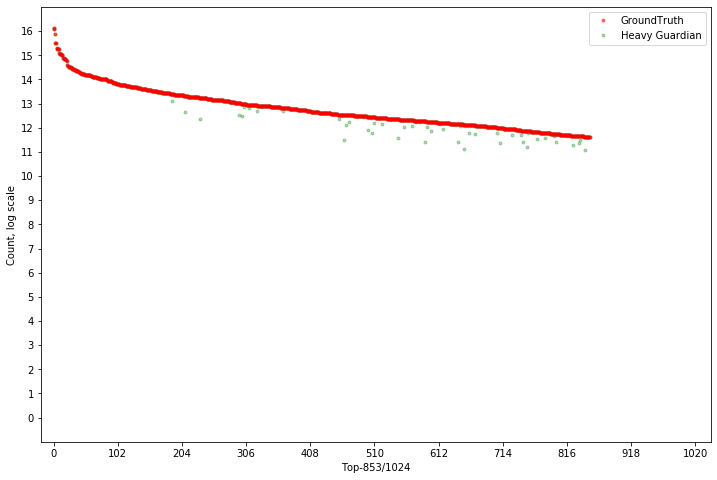

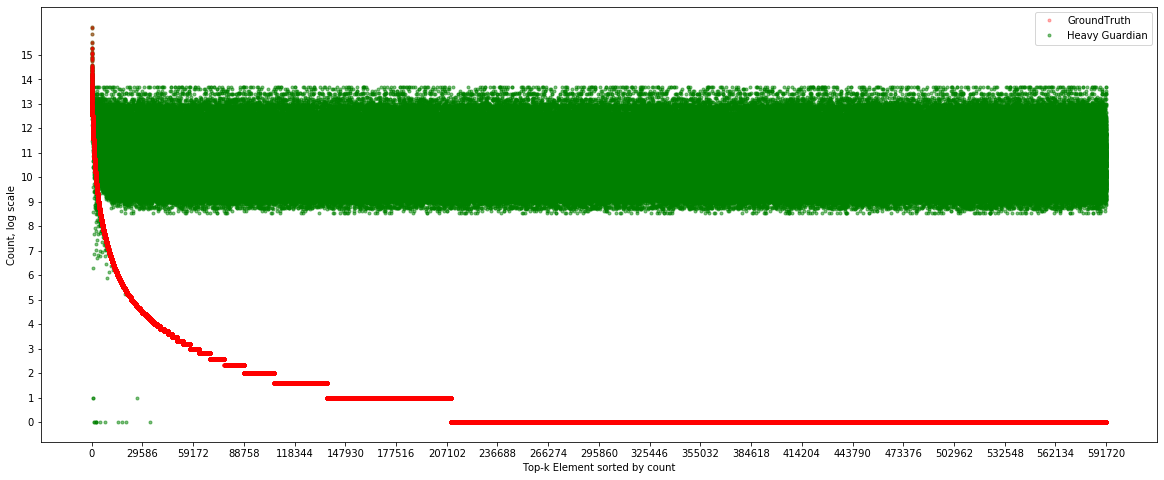

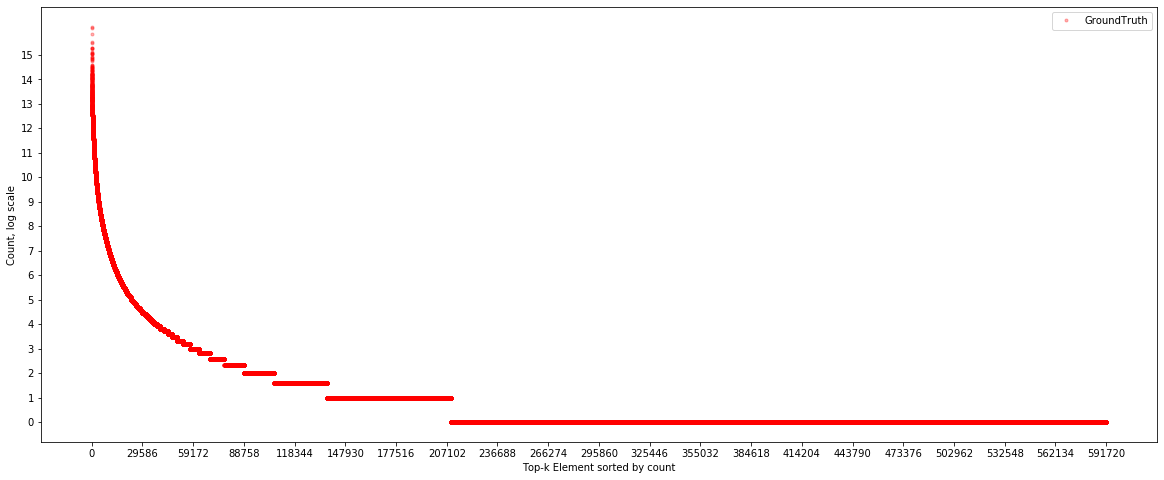

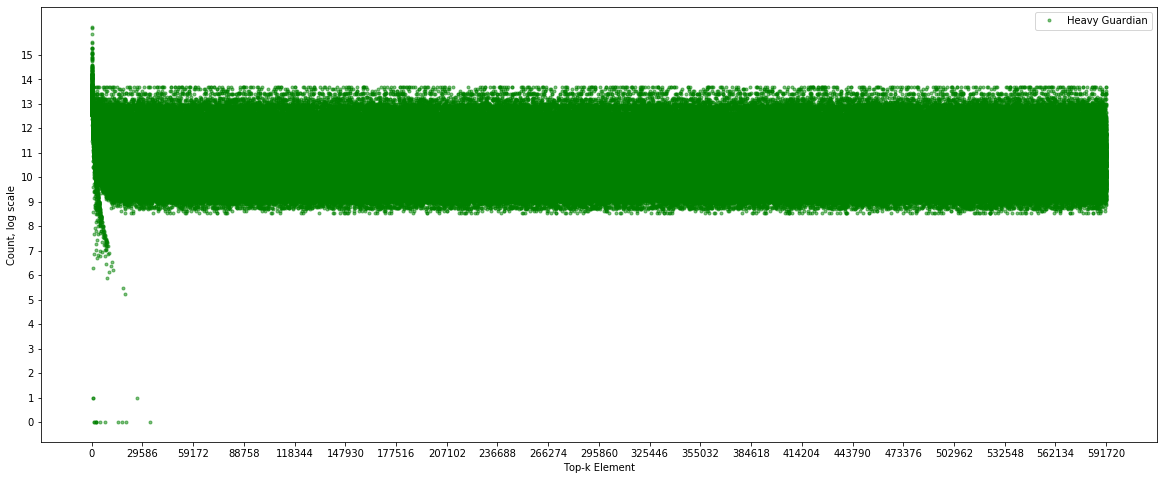

In [2]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=200
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 208.211 seconds.
300 nodes, per-node= <8 heavy+ 16 light>
Total size 327.09375 kbytes, 
Heavy part: 275.53125 kbytes
Light part: 51.5625 kbytes
Precision:  0.951
heavy_are: 0.004,heavy_aae:22.304
all_are: 851.384,all_aae:1137.684
Estimate time:   8.591 seconds.


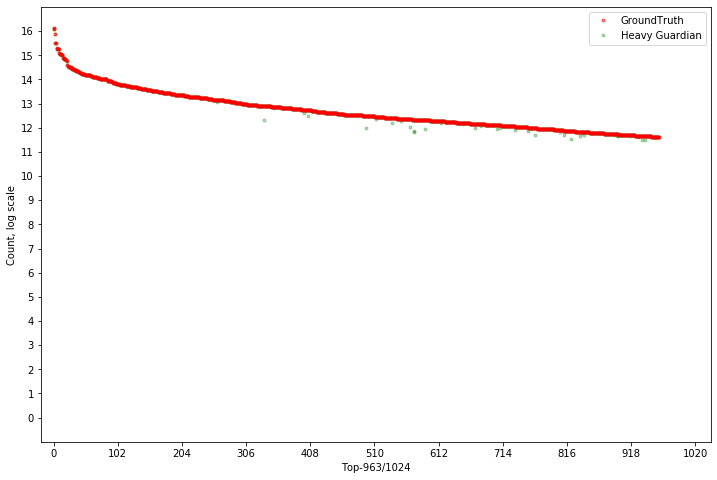

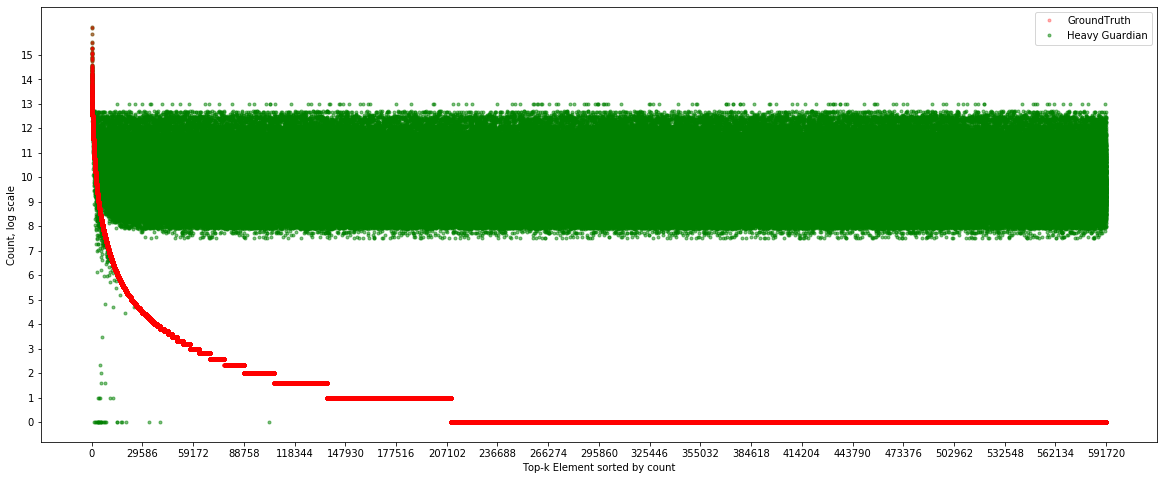

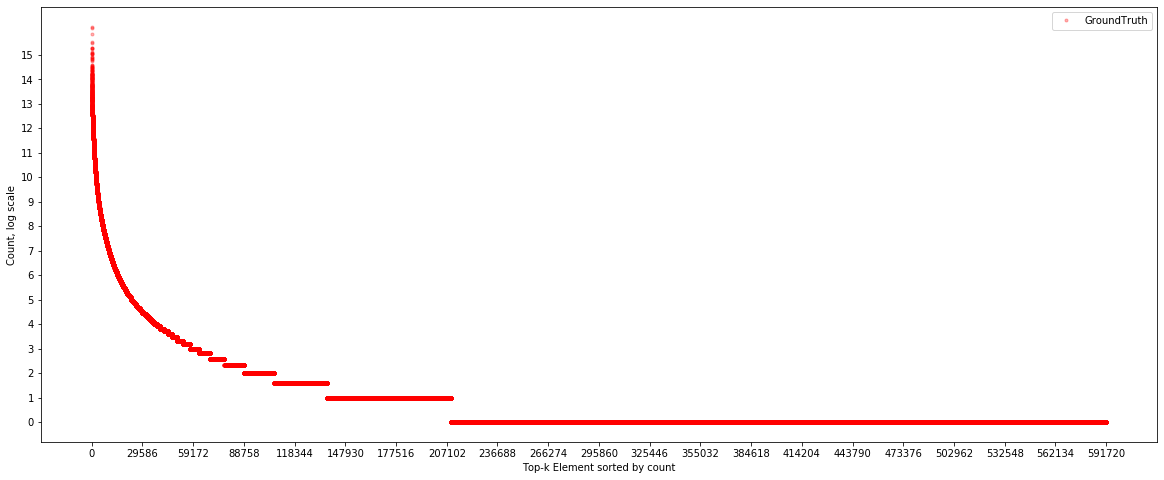

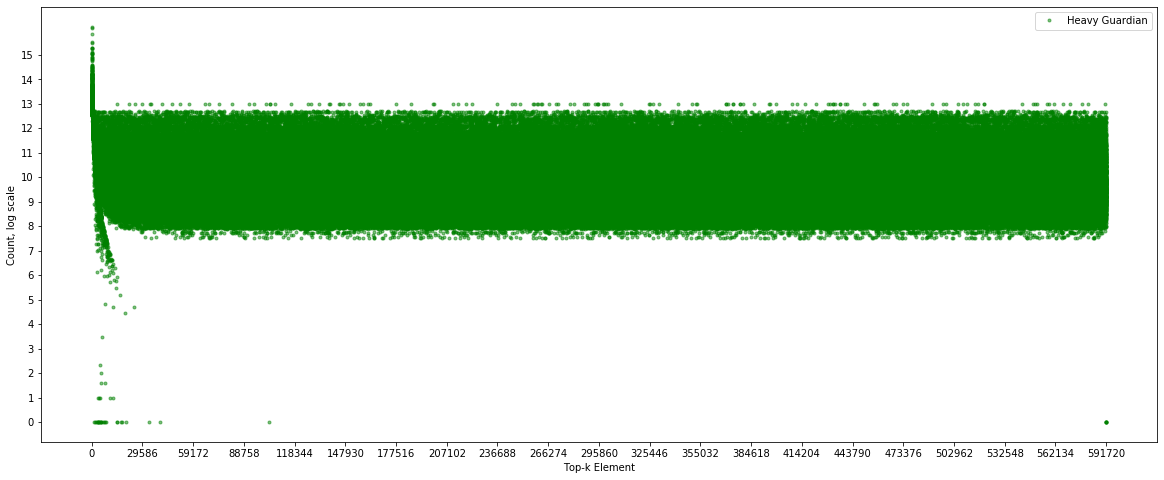

In [3]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=300
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 181.028 seconds.
400 nodes, per-node= <8 heavy+ 16 light>
Total size 480.5703125 kbytes, 
Heavy part: 411.8203125 kbytes
Light part: 68.75 kbytes
Precision:  0.990
heavy_are: 0.002,heavy_aae: 8.662
all_are: 535.167,all_aae: 713.435
Estimate time:   9.156 seconds.


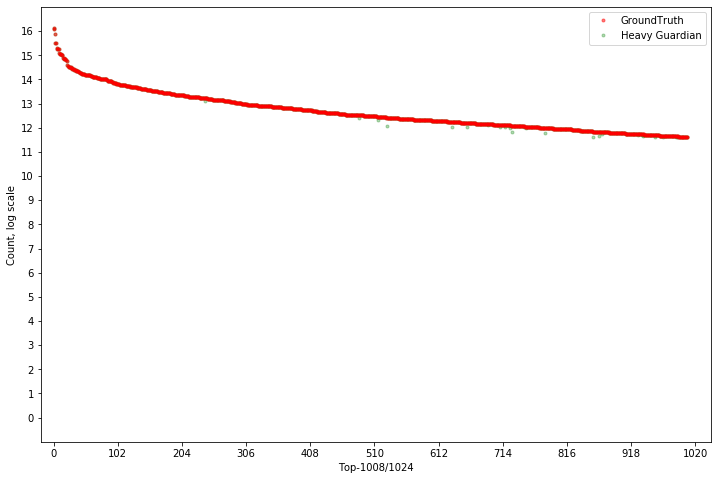

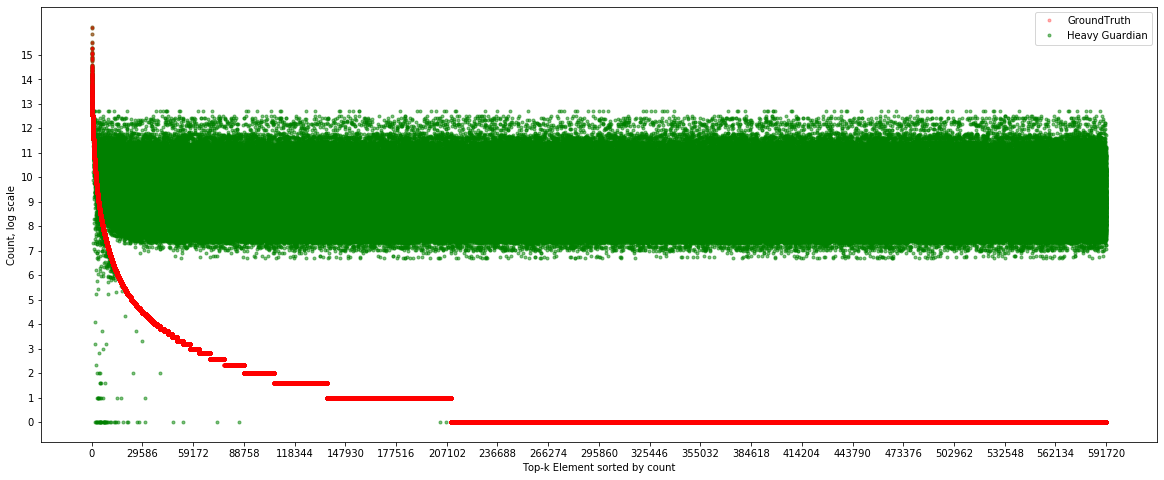

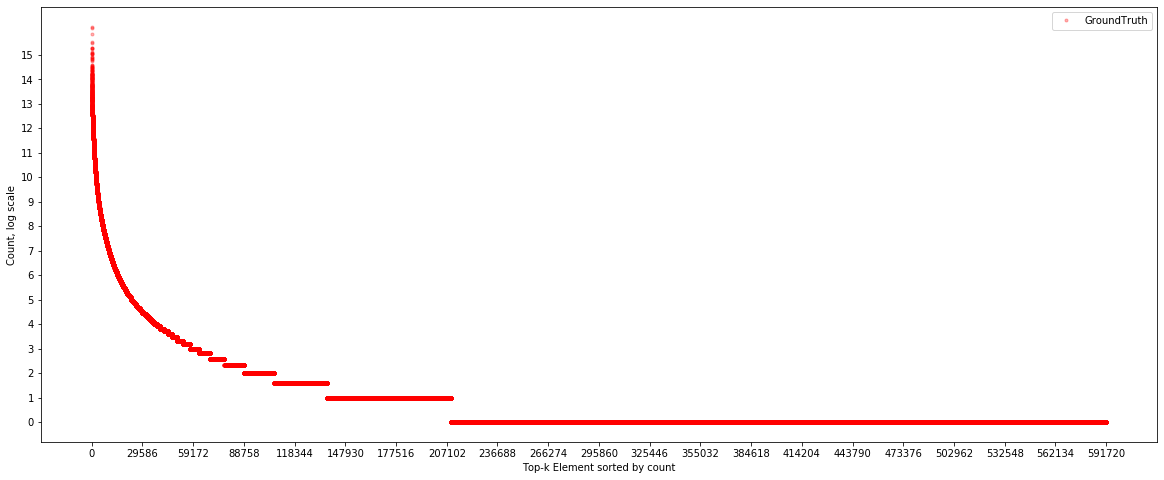

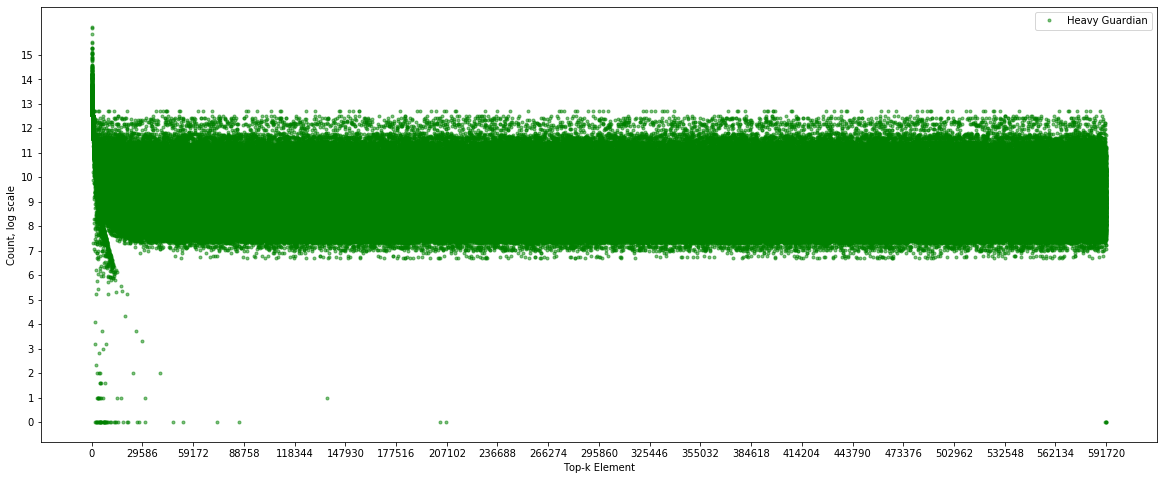

In [4]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=400
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 215.161 seconds.
500 nodes, per-node= <8 heavy+ 16 light>
Total size 559.5078125 kbytes, 
Heavy part: 473.5703125 kbytes
Light part: 85.9375 kbytes
Precision:  0.994
heavy_are: 0.000,heavy_aae: 1.525
all_are: 366.859,all_aae: 488.599
Estimate time:   9.527 seconds.


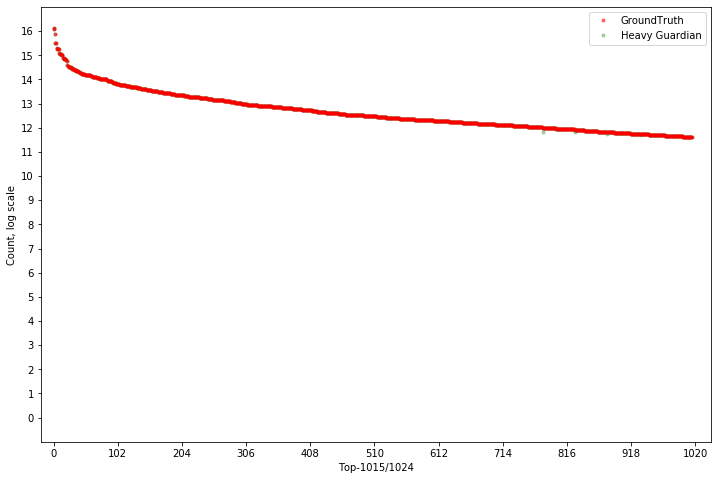

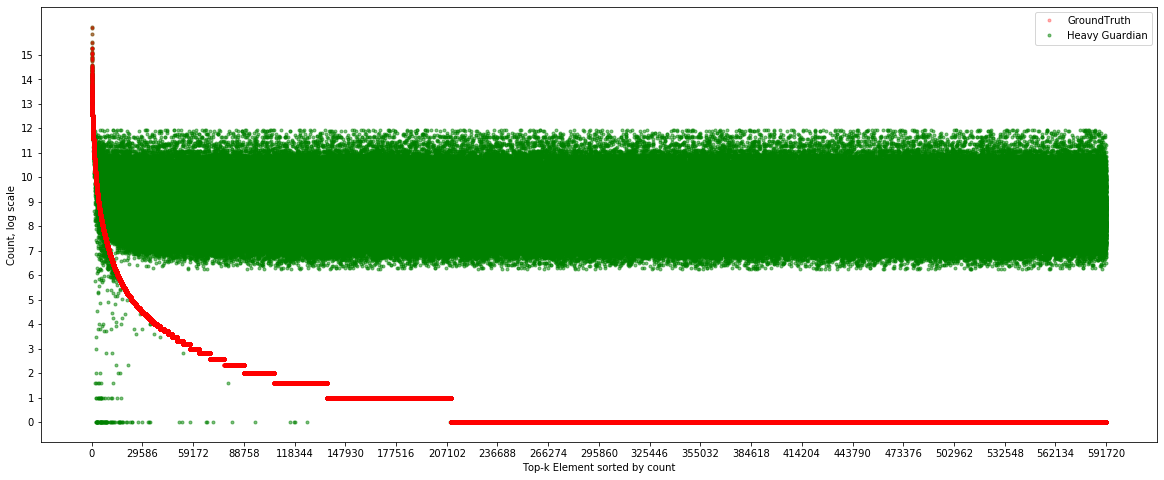

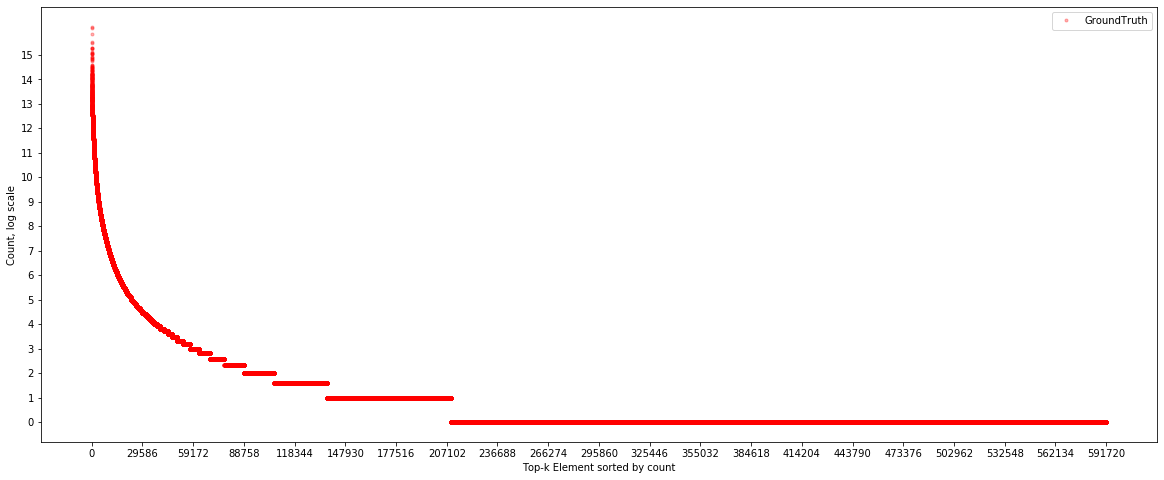

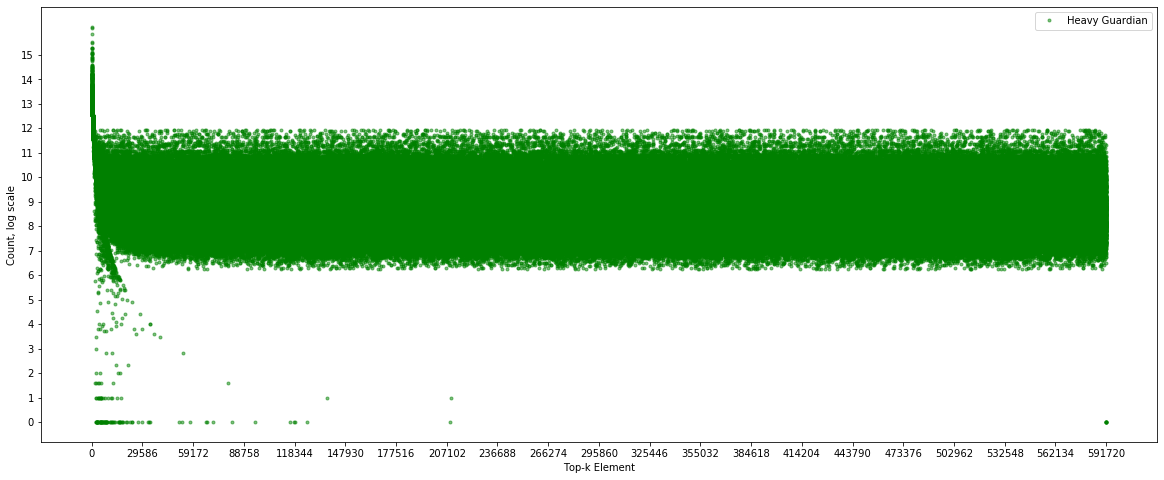

In [5]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=500
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 180.155 seconds.
600 nodes, per-node= <8 heavy+ 16 light>
Total size 635.0703125 kbytes, 
Heavy part: 531.9453125 kbytes
Light part: 103.125 kbytes
Precision:  0.998
heavy_are: 0.000,heavy_aae: 1.041
all_are: 272.797,all_aae: 362.891
Estimate time:   8.510 seconds.


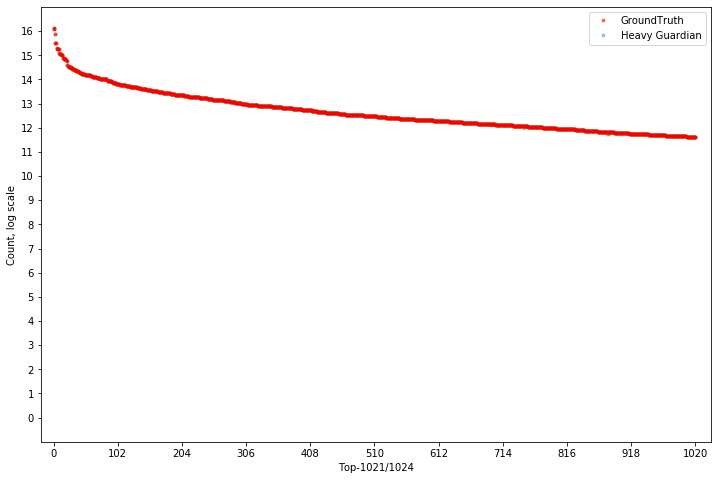

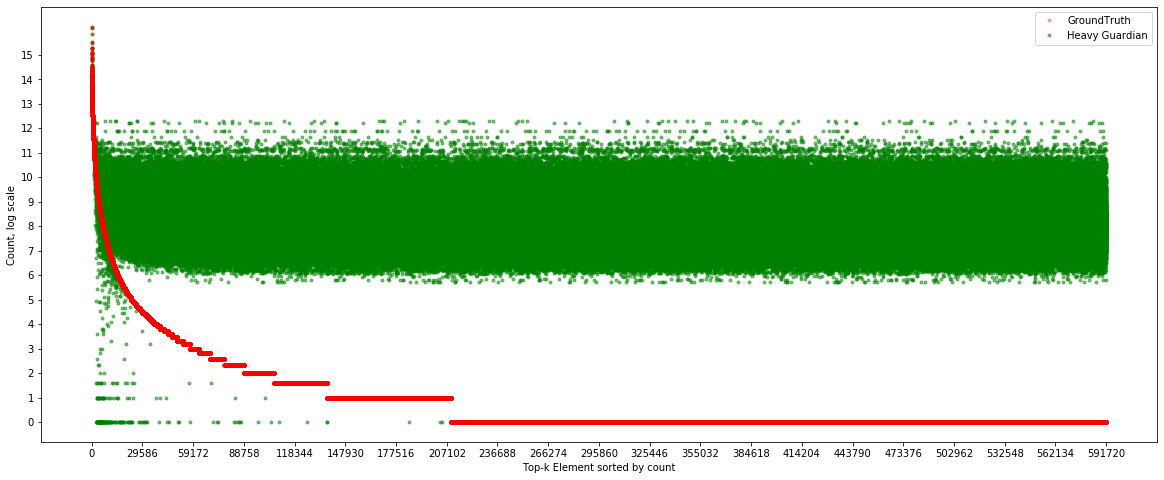

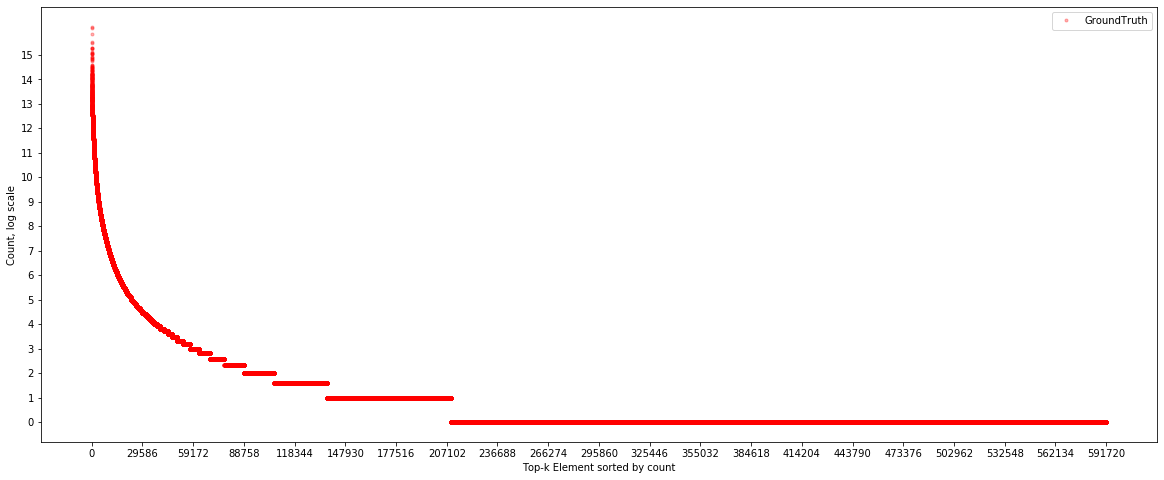

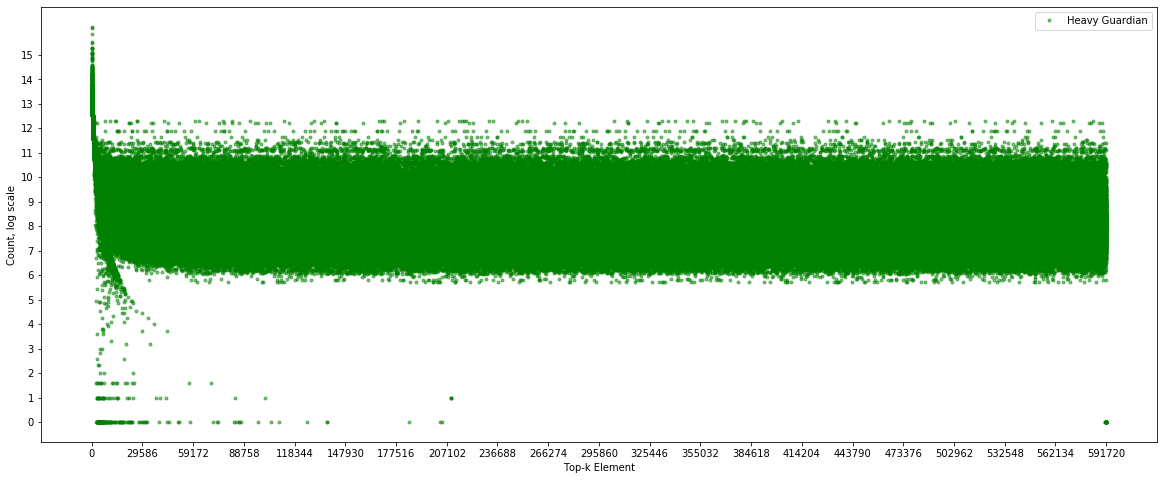

In [6]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=600
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 181.028 seconds.
700 nodes, per-node= <8 heavy+ 16 light>
Total size 853.3125 kbytes, 
Heavy part: 733.0 kbytes
Light part: 120.3125 kbytes
Precision:  1.000
heavy_are: 0.000,heavy_aae: 0.162
all_are: 209.600,all_aae: 278.248
Estimate time:   9.070 seconds.


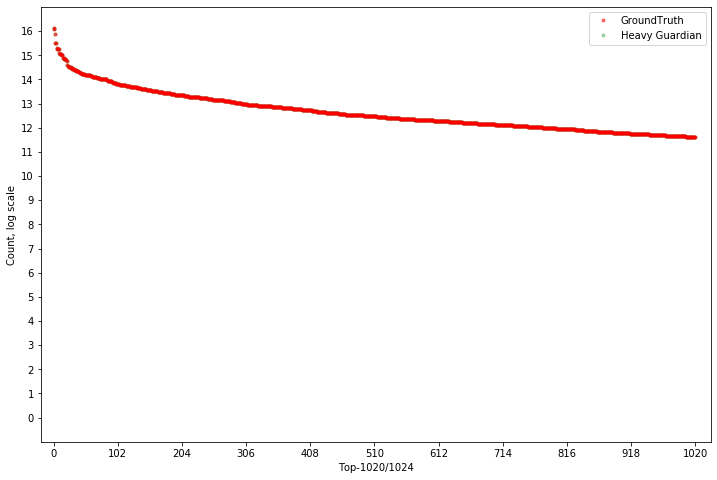

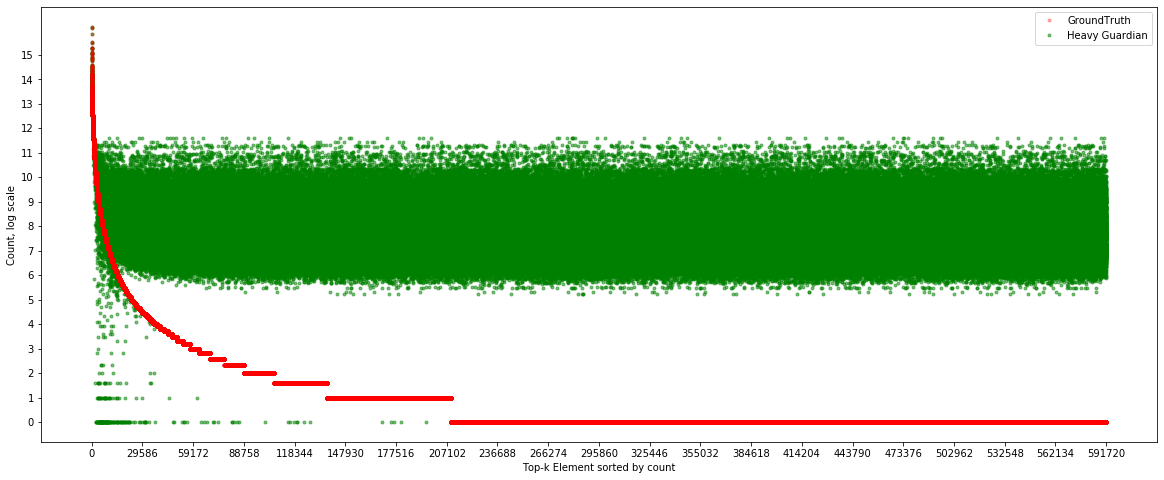

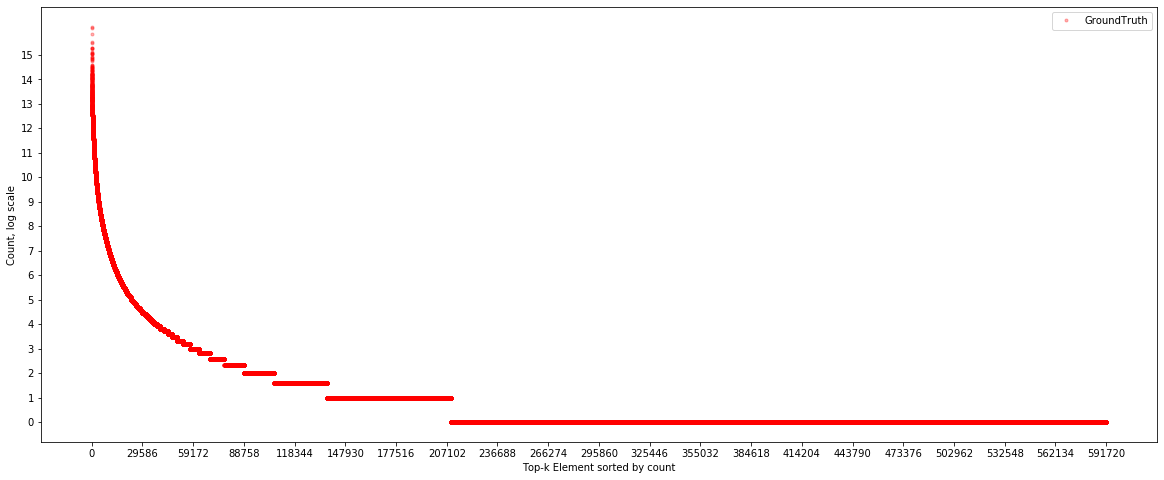

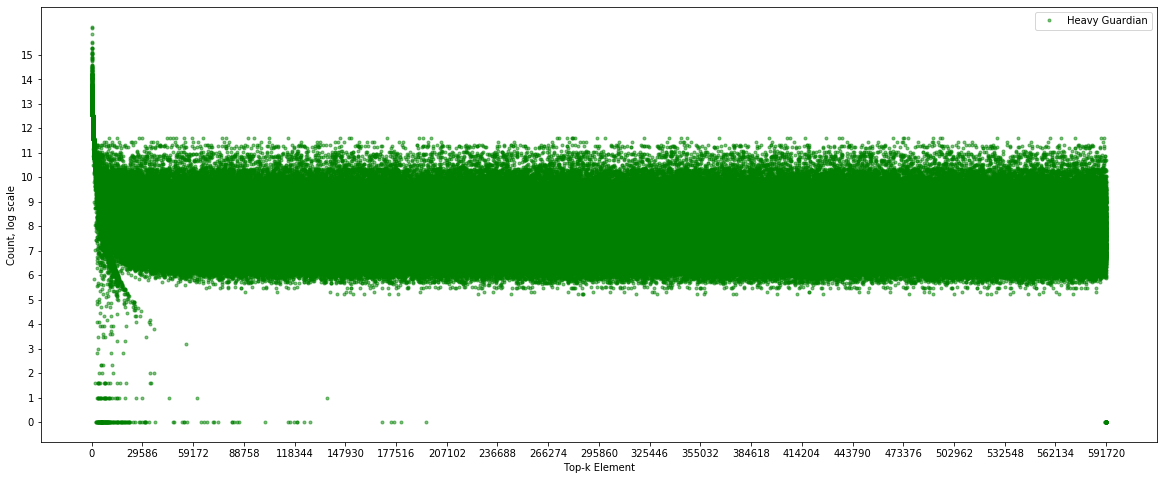

In [7]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=700
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 164.237 seconds.
800 nodes, per-node= <8 heavy+ 16 light>
Total size 923.5625 kbytes, 
Heavy part: 786.0625 kbytes
Light part: 137.5 kbytes
Precision:  1.000
heavy_are: 0.000,heavy_aae: 0.396
all_are: 167.854,all_aae: 222.594
Estimate time:   8.442 seconds.


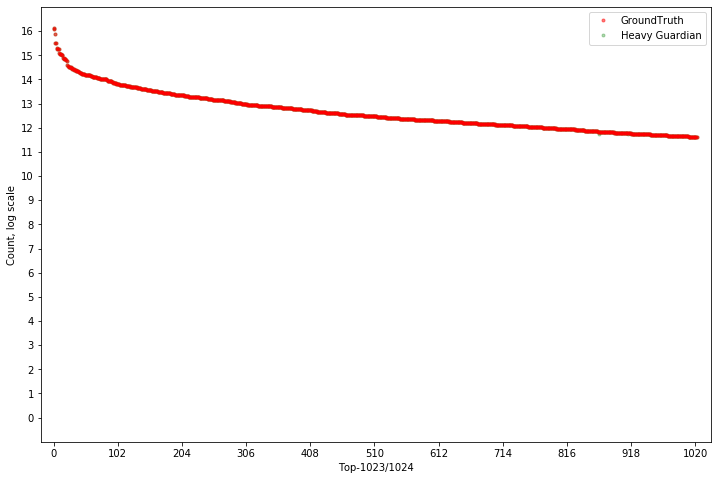

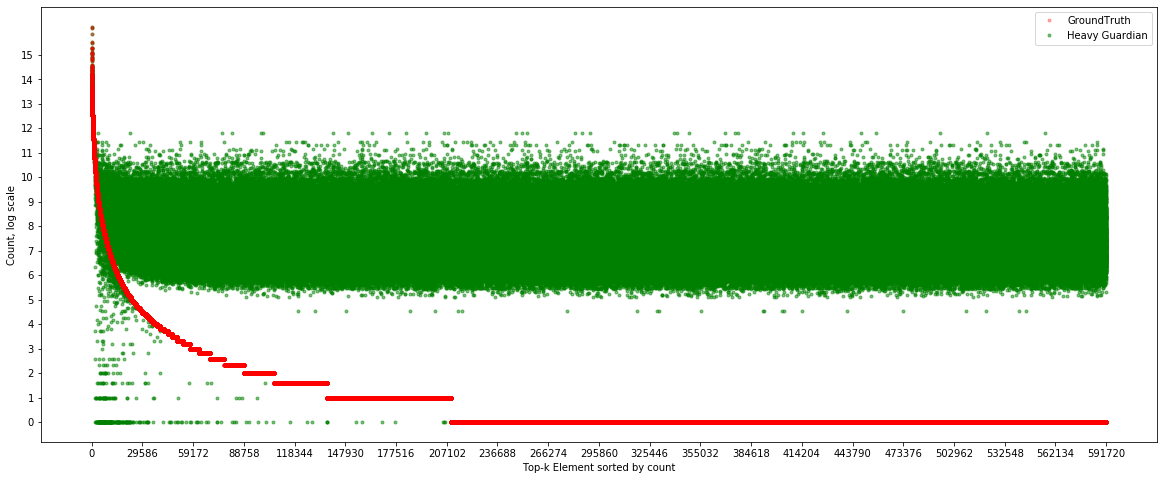

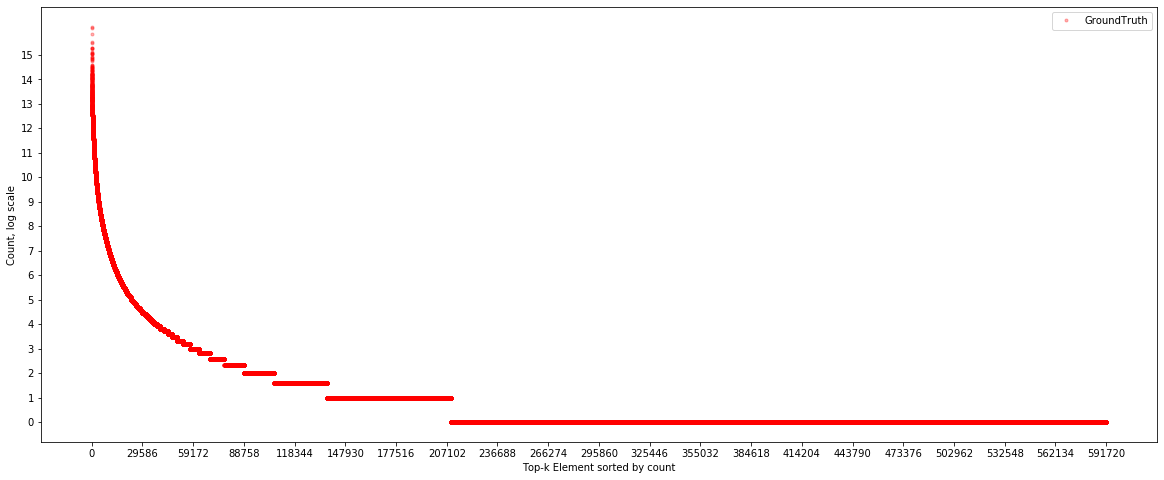

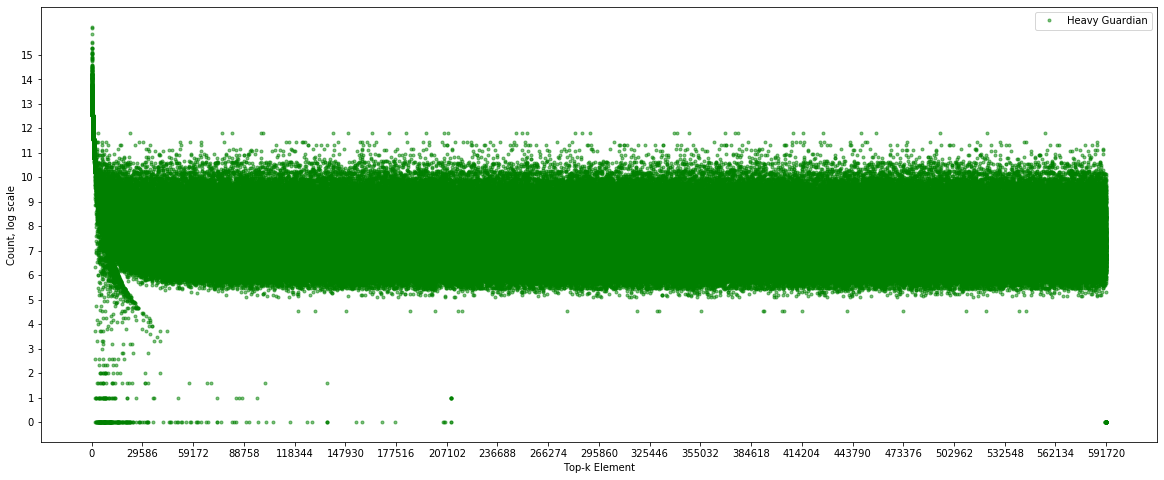

In [8]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=800
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)


EOF
Execution time: 174.355 seconds.
900 nodes, per-node= <8 heavy+ 16 light>
Total size 994.15625 kbytes, 
Heavy part: 839.46875 kbytes
Light part: 154.6875 kbytes
Precision:  1.000
heavy_are: 0.000,heavy_aae: 0.141
all_are: 137.624,all_aae: 182.172
Estimate time:   9.160 seconds.


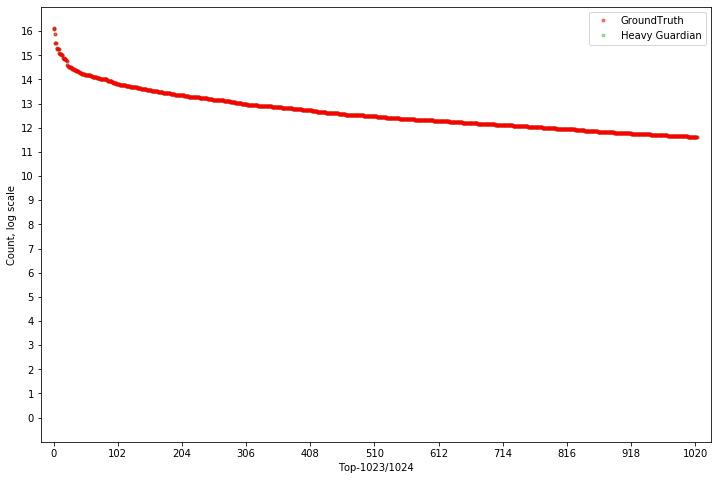

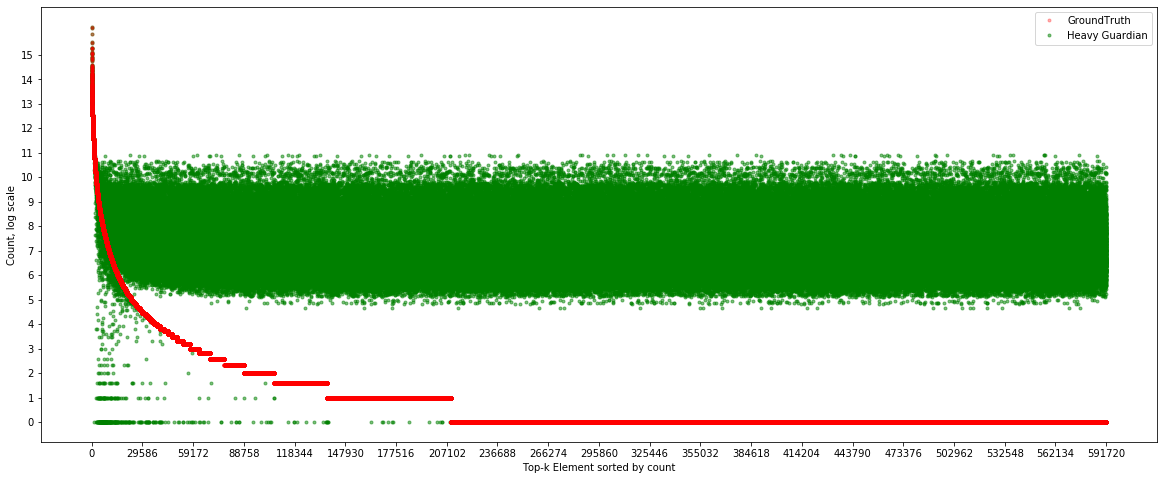

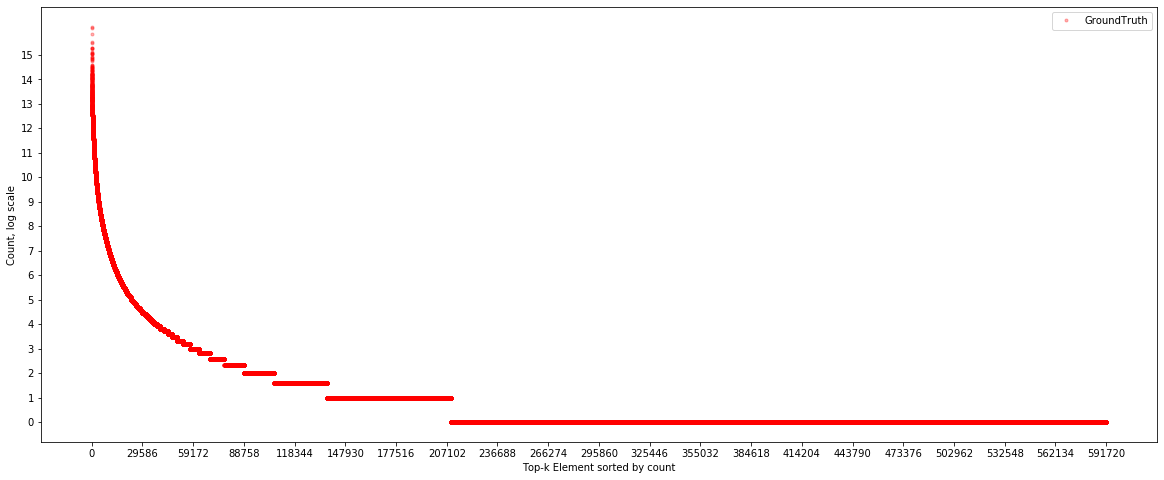

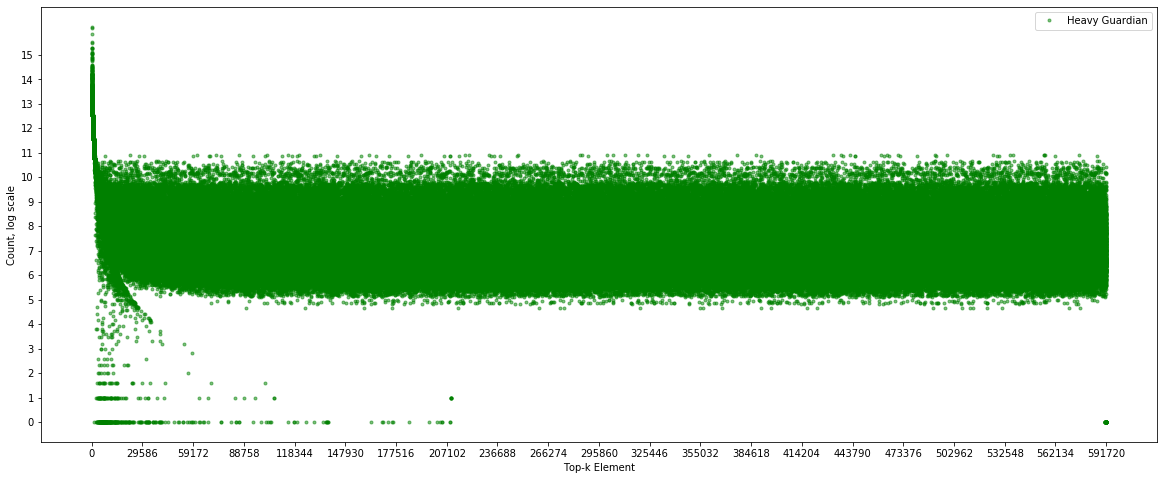

In [9]:
# webdocs'
import sys
sys.path.append("..")
import Config
import Func
import HG
import os
import time
import pandas as pd
import numpy as np
import re

from pympler import asizeof
dataset='webdocs'

# =============================dataset path and file=============================
# dataset
filepath='..\..\dataset\webdocs'
pattern='out_.*'
r=re.compile(pattern)
filelist=list(filter(r.match,os.listdir(filepath)))    
    # dataset file list

gr_file_name='webdocs_00_ground_truth.csv'        
gr_path=os.path.join(filepath,gr_file_name)
    # ground truth path

# =============================Initialize=============================
# set default value
heavy_size=8
light_size=16
size=900
b=1.08
topk=1024
if heavy_size*size<=topk:
    topk=heavy_size*size
Config.Set_default(heavy_size,light_size,size,b,topk)

# Generate a hash table
HG_list=[HG.HeavyGuardian() for _ in range(Config.size)]

# =============================Stream processing=============================
hg_start=time.time()
# stream processing
#item_count=10000
for datafile in filelist[:1]:
    src_data=os.path.join(filepath,datafile)
    with open(src_data,'r') as file:
        while True:
            e=file.readline().strip('\n')
            if not e:
                print("EOF")
                break
            else:     
                # Heavy part insert
                #item_count-=1
                item=HG.Node(str(e),1)
                HG_list=Func.InsertHG(item,HG_list)
hg_end=time.time()

# =============================Print and Plot result=============================
print("Execution time:{:8.3f} seconds.".format(hg_end-hg_start))
print("{} nodes, per-node= <{} heavy+ {} light>".format(len(HG_list),len(HG_list[0].heavy_part),len(HG_list[0].light_part)))

# =============================Top-k from result=============================
Top_dict=dict()
for i in range(len(HG_list)):
    for j in range(len(HG_list[i].heavy_part)):
        Top_dict[HG_list[i].heavy_part[j].ID]=HG_list[i].heavy_part[j].count
Top_dict=dict(sorted(Top_dict.items(), key=lambda item: item[1],reverse=True))

# Memory usage
sk0=asizeof.asizeof(Top_dict)
sk2=0
for item in HG_list:
    sk2+=asizeof.asizeof(item.light_part)
print("Total size {} kbytes, ".format((sk0+sk2)/1024))
print("Heavy part: {} kbytes".format(sk0/1024))
print("Light part: {} kbytes".format(sk2/1024))    

# Element-Precision
tp_set,precision=Func.Get_precision(gr_path,Top_dict,topk)
print("Precision: {:6.3f}".format(precision))

# Count ARE/AAE
startx=time.time()
# heavy part
gr=pd.read_csv(gr_path)
gr=gr[:topk]
gr['Element']=gr['Element'].astype('str')
result=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
result=result[:topk]
diff=gr.merge(result,how='inner',on='Element',suffixes=('_t', '_r'))
hare,haae=Func.Get_HH_ARE_AAE(diff)

# all
heavy_are,heavy_aae,all_are,all_aae=Func.Get_ARE_AAE(gr_path,HG_list,Top_dict)
endx=time.time()

print('heavy_are:{:6.3f},heavy_aae:{:6.3f}'.format(heavy_are,heavy_aae))
print('all_are:{:8.3f},all_aae:{:8.3f}'.format(all_are,all_aae))
print("Estimate time:{:8.3f} seconds.".format(endx-startx))

Func.Plot_topk_compare(gr_path,Top_dict,'Heavy Guardian')

# All element compare
ground_truth=Func.Get_ground_truth(gr_path)
My_result=dict()
for item in ground_truth:
    # item:ID of e
    My_result[item]=Func.HG_Query(item,HG_list)
Func.Plot_all_compare(ground_truth,My_result,'Heavy Guardian')

# =============================result to csv=============================
path="..\\result\\HG\\"+dataset+"\\"+str(Config.size)+"_"+str(Config.heavy)

# Top_dict to csv
filename='HG_Top_'+str(Config.size*Config.heavy)+'_'+dataset+'.csv'
topdf=pd.DataFrame(Top_dict.items(),columns=['Element','Count'])
topdf.to_csv(os.path.join(path,filename),index=False)

# Sketch to csv
import numpy as np

light=np.empty(Config.light,dtype='int32')
for item in HG_list:
    #print(item.light_part,item.light_part.shape)
    light=np.vstack([light,item.light_part])
light=light[1:]

filename='HG_Sketch_'+str(Config.size)+'x'+str(Config.light)+'_'+dataset+'.csv'
pd.DataFrame(light).to_csv((os.path.join(path,filename)),index=False)
